# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[81, 89, 30, ..., 75, 81,  6],
       [78, 21,  8, ..., 32, 65, 22],
       [97, 95, 83, ..., 91,  4, 15],
       ...,
       [26, 97,  1, ..., 30, 50, 97],
       [69, 46, 76, ..., 15, 34,  5],
       [65, 46, 80, ...,  2, 87, 64]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [7]:
B = np.transpose(np.random.permutation(np.transpose(A)))
B

array([[75, 26, 19, ...,  6, 73,  3],
       [11, 52, 74, ..., 79, 48, 41],
       [11, 65,  3, ..., 11, 55, 17],
       ...,
       [24, 39, 41, ...,  1, 53, 29],
       [63, 23, 75, ..., 63, 77, 30],
       [90, 47, 84, ...,  3, 21, 63]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [8]:
C = A[A[:,::2].sum(axis=1) > A[:,1::2].mean()]
C

array([[81, 89, 30, ..., 75, 81,  6],
       [78, 21,  8, ..., 32, 65, 22],
       [97, 95, 83, ..., 91,  4, 15],
       ...,
       [26, 97,  1, ..., 30, 50, 97],
       [69, 46, 76, ..., 15, 34,  5],
       [65, 46, 80, ...,  2, 87, 64]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [9]:
i = np.argmax(np.max(A, axis=1) - np.min(A, axis=1))
i

6

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [10]:
D = np.argsort(A.reshape(1, len(A)*len(A[0]))).reshape(len(A),len(A[0])) + 1
D

array([[6498, 6673, 5373, ...,  861, 8361, 8425],
       [6400, 4864, 4777, ..., 9607,  974, 9066],
       [9770, 7945, 7659, ..., 7676, 9934, 5942],
       ...,
       [ 302, 8649, 4767, ..., 2527, 3177, 1455],
       [3115, 5926, 3579, ..., 5928, 2567, 2623],
       [ 814, 6294, 3493, ..., 9182, 1769, 1215]])

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массив, в каждой строке которого максимальный элемент равен $1$, минимальный - $0$. 

In [11]:
E = (A - A.min(axis=1)[:1]) / (A.max(axis=1)[:1] - A.min(axis=1)[:1])
E

array([[ 0.82105263,  0.90526316,  0.28421053, ...,  0.75789474,
         0.82105263,  0.03157895],
       [ 0.78947368,  0.18947368,  0.05263158, ...,  0.30526316,
         0.65263158,  0.2       ],
       [ 0.98947368,  0.96842105,  0.84210526, ...,  0.92631579,
         0.01052632,  0.12631579],
       ...,
       [ 0.24210526,  0.98947368, -0.02105263, ...,  0.28421053,
         0.49473684,  0.98947368],
       [ 0.69473684,  0.45263158,  0.76842105, ...,  0.12631579,
         0.32631579,  0.02105263],
       [ 0.65263158,  0.45263158,  0.81052632, ..., -0.01052632,
         0.88421053,  0.64210526]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [12]:
c = np.arange(1, 11).reshape((-1, 1, 1))   # shape: (10, 1, 1)
A * c   # shape: (200, 50) * (10, 1, 1) = (1, 200, 50) * (10, 1, 1) = (10, 200, 50)

array([[[ 81,  89,  30, ...,  75,  81,   6],
        [ 78,  21,   8, ...,  32,  65,  22],
        [ 97,  95,  83, ...,  91,   4,  15],
        ...,
        [ 26,  97,   1, ...,  30,  50,  97],
        [ 69,  46,  76, ...,  15,  34,   5],
        [ 65,  46,  80, ...,   2,  87,  64]],

       [[162, 178,  60, ..., 150, 162,  12],
        [156,  42,  16, ...,  64, 130,  44],
        [194, 190, 166, ..., 182,   8,  30],
        ...,
        [ 52, 194,   2, ...,  60, 100, 194],
        [138,  92, 152, ...,  30,  68,  10],
        [130,  92, 160, ...,   4, 174, 128]],

       [[243, 267,  90, ..., 225, 243,  18],
        [234,  63,  24, ...,  96, 195,  66],
        [291, 285, 249, ..., 273,  12,  45],
        ...,
        [ 78, 291,   3, ...,  90, 150, 291],
        [207, 138, 228, ...,  45, 102,  15],
        [195, 138, 240, ...,   6, 261, 192]],

       ...,

       [[648, 712, 240, ..., 600, 648,  48],
        [624, 168,  64, ..., 256, 520, 176],
        [776, 760, 664, ..., 728,  32, 120

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [13]:
a1 = A[:,1::2]
a1
a2 = A[:,0::2]
F = np.concatenate((a2, a1), axis=1)
F

array([[81, 30, 21, ..., 64, 75,  6],
       [78,  8, 52, ..., 34, 32, 22],
       [97, 83, 68, ...,  3, 91, 15],
       ...,
       [26,  1, 82, ..., 95, 30, 97],
       [69, 76, 26, ..., 86, 15,  5],
       [65, 80, 40, ..., 19,  2, 64]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [14]:
len(A[np.all(A > 5, axis=1)])

6

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [15]:
np.mean(np.split(A, 10), axis=0)

array([[57.7, 56.2, 66.7, 45.1, 45. , 56.1, 36. , 49.7, 51.2, 48.2, 39.7,
        43.2, 50.6, 53.6, 56.1, 32.9, 17. , 43.4, 51.8, 45.7, 28.8, 43.2,
        46.5, 39.8, 52.5, 52.8, 41.2, 46.4, 53.4, 51. , 60.5, 56.9, 51.1,
        31.9, 66.3, 56.3, 41.7, 69.6, 57. , 46.3, 48.6, 49.8, 52.6, 51.6,
        49.3, 44.6, 36.6, 50.8, 47.4, 65.7],
       [52.6, 47.3, 42.9, 64.1, 63. , 41.1, 41.5, 45.8, 43.5, 48.2, 42.5,
        52.2, 52.8, 38.4, 41.5, 45.6, 37.2, 60.1, 43.2, 47. , 41.5, 49.2,
        64.4, 44.7, 48.4, 42.4, 51.1, 47.1, 45.6, 50.1, 47. , 56.9, 66.9,
        59.1, 50.2, 54.3, 45.7, 48.1, 37.5, 54.1, 37. , 47.5, 47.1, 54.9,
        43.2, 59.5, 56.2, 55.2, 48.2, 43. ],
       [58.8, 58.1, 51.1, 52. , 37.4, 56.8, 44.1, 55.4, 31.8, 51.4, 67.2,
        41.3, 31.5, 61.2, 52.8, 52.7, 55.4, 56.5, 36.2, 71.8, 51.5, 56.4,
        53.1, 61.4, 48.7, 43.6, 58.5, 33.9, 64.7, 47.9, 51.5, 56.9, 37.9,
        41.4, 26.9, 54.5, 47.3, 41.5, 53. , 54.6, 58.3, 51.1, 37.7, 41.9,
        47.5, 47. , 51

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [16]:
_, ind = np.unique(A, return_index=True)
J = A.reshape((1, len(A) * len(A[0])))
J[0][np.sort(ind)]  

array([81, 89, 30, 56, 21,  3, 20, 75, 10, 25, 26,  4, 39, 44, 86,  8, 46,
       98,  6, 83,  5, 88, 53, 41, 48, 49, 93, 90, 95, 32, 79, 31, 71, 87,
       73, 42, 64, 19, 78, 50, 52, 40, 11, 15, 96, 35, 54, 68, 66, 69, 62,
        2, 18, 24, 51, 63, 36, 67, 70, 80, 47, 34, 74, 65, 22, 97, 17,  1,
       45, 16, 28, 76, 43, 33, 55,  9, 91,  7, 59, 13, 77, 27, 61, 82, 58,
       85, 12,  0, 84, 72, 57, 99, 94, 37, 23, 29, 14, 92, 60, 38])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [17]:
np.linalg.norm(A - np.mean(A, axis=0), axis=1)

array([215.93896476, 186.21091939, 209.169062  , 207.58281841,
       200.51245971, 219.50878456, 223.01566425, 212.07141839,
       212.65308956, 187.03180612, 193.86530504, 226.62876362,
       202.53448225, 192.37168841, 198.40727431, 220.80198482,
       216.2543329 , 213.49420718, 207.11768756, 211.0421439 ,
       185.18948809, 206.6414201 , 192.71786762, 199.19075405,
       194.37892504, 184.82885732, 195.9471268 , 202.22160246,
       196.03973194, 217.97535755, 204.69916097, 206.37966591,
       201.77997051, 201.17670467, 206.19191667, 210.4153666 ,
       208.90767458, 203.80506986, 192.09676338, 209.88679449,
       195.91129753, 212.26598055, 216.35449267, 203.1916989 ,
       199.31629763, 203.00944929, 217.762041  , 217.87227107,
       198.47724429, 196.06561784, 219.69544033, 179.9557904 ,
       177.75392119, 182.26899489, 218.29795349, 217.0574728 ,
       207.7132314 , 181.12428468, 201.58166211, 212.52088486,
       206.67282477, 191.5911963 , 216.11105131, 177.84

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [18]:
np.where(A < 50, 2 * A, 3 * A)

array([[243, 267,  60, ..., 225, 243,  12],
       [234,  42,  16, ...,  64, 195,  44],
       [291, 285, 249, ..., 273,   8,  30],
       ...,
       [ 52, 291,   2, ...,  60, 150, 291],
       [207,  92, 228, ...,  30,  68,  10],
       [195,  92, 240, ...,   4, 261, 192]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [19]:
def moving_average(arr:np.ndarray, window_size: int) -> np.ndarray:
    return np.convolve(arr[0], np.ones(window_size) / window_size, mode='valid') 
    
V = A.reshape((1, len(A) * len(A[0])))
V3 = moving_average(V, 3)
V5 = moving_average(V, 5)
V10 = moving_average(V, 10)

V5 = np.concatenate((V5,  np.zeros(V3.shape[0] - V5.shape[0])))
V10 = np.concatenate((V10,  np.zeros(V3.shape[0] - V10.shape[0])))
V3 + V5 + V10

array([163.06666667, 133.63333333,  88.66666667, ...,  86.2       ,
        57.66666667,  51.        ])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

Optimization terminated successfully.
         Current function value: -4.882074
         Iterations: 6
         Function evaluations: 16
         Gradient evaluations: 8


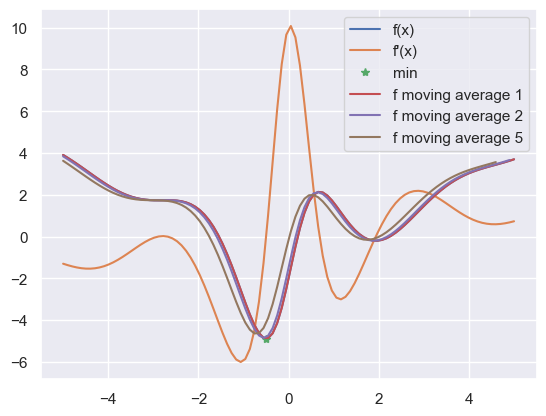

In [35]:
# Построй график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$ и производной этой функции 
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from scipy.misc import derivative
from typing import Union, Callable


def f(x: np.ndarray) -> np.ndarray:
    return (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x ** 3) - x ** 2) / (x ** 2 + 1)

def df(f: Callable[[np.ndarray], np.ndarray], x: np.ndarray) -> np.ndarray:
    return derivative(f, x, dx=1e-6)


x = np.linspace(-5, 5, 100)  # (-10, 10, 1000)
y = f(x) ## (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x ** 3) - x ** 2) / (x ** 2 + 1)
dy = df(f, x)

# print(y)

plt.plot(x, y, label='f(x)')
plt.plot(x, dy, label='f\'(x)')

min_f_p = scipy.optimize.fmin_bfgs(f, 0, full_output=True)
x_min, y_min = min_f_p[0][0], min_f_p[1]
plt.plot(x_min, y_min, '*', label='min ') 

Y = y.reshape((1, len(x)))
m_a_1 = moving_average(Y, 1)
m_a_2 = moving_average(Y, 2)
m_a_5 = moving_average(Y, 5)

plt.plot(x, m_a_1, label='f moving average 1')  # ?
plt.plot(x[:len(m_a_2)], m_a_2, label='f moving average 2')
plt.plot(x[:len(m_a_5)], m_a_5, label='f moving average 5')

plt.legend()
plt.show()

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [21]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[0, 0, 1, 0, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [22]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

2096

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [23]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


0.00631553542110766

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.